# **Machine Learning Project : AutoSort - AI-Powered Email Categorizer**

## **Import Libraries and Upload the Dataset ____ :**

In [27]:
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the dataset
df = pd.read_csv(next(iter(uploaded)), encoding='ISO-8859-1')

# Show the first few rows of the dataset
df.head()


Saving spam.csv to spam (4).csv


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## **Data Preprocessing and Label Creation ___ :**

In [28]:
# Rename columns to 'label' and 'message'
df = df[['v1', 'v2']]  # If columns are not in order, use the correct column names
df.columns = ['label', 'message']

# Create a function to classify 'ham' messages into 'personal' and 'work'
def classify_personal_or_work(message):
    # Define some keywords to classify the emails
    work_keywords = ['meeting', 'project', 'deadline', 'client', 'business', 'work', 'conference']
    personal_keywords = ['friend', 'family', 'birthday', 'personal', 'holiday', 'vacation', 'event']

    # Convert the message to lower case to handle case sensitivity
    message_lower = message.lower()

    # If the message contains work-related keywords, classify as 'work'
    for keyword in work_keywords:
        if keyword in message_lower:
            return 'Work'

    # If the message contains personal-related keywords, classify as 'personal'
    for keyword in personal_keywords:
        if keyword in message_lower:
            return 'Personal'

    # Default to 'personal' if no keyword is found
    return 'Personal'

# Apply the classification function to the 'ham' messages
df['new_label'] = df.apply(lambda row: classify_personal_or_work(row['message']) if row['label'] == 'ham' else row['label'], axis=1)

# Show the updated dataframe with the new label
df.head()

# Save the updated dataset if needed
df.to_csv('classified_emails.csv', index=False)


<ipython-input-28-c7a9f230f756>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_label'] = df.apply(lambda row: classify_personal_or_work(row['message']) if row['label'] == 'ham' else row['label'], axis=1)


## **Splitting Data and Vectorizing Text**

In [29]:
# Import necessary libraries for training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['new_label'], test_size=0.2, random_state=42)

# Convert the text data into numerical features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


## **Training the Model**

In [30]:
# Import the Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
classifier = MultinomialNB()

# Train the model
classifier.fit(X_train_vectorized, y_train)


MultinomialNB()

## **Making Predictions and Evaluating the Model**

In [31]:
# Import metrics for evaluation
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9488789237668162

Classification Report:
               precision    recall  f1-score   support

    Personal       0.95      0.99      0.97       917
        Work       0.85      0.23      0.36        48
        spam       0.96      0.92      0.94       150

    accuracy                           0.95      1115
   macro avg       0.92      0.71      0.76      1115
weighted avg       0.95      0.95      0.94      1115



## **Graphical Representation of Model Performance**

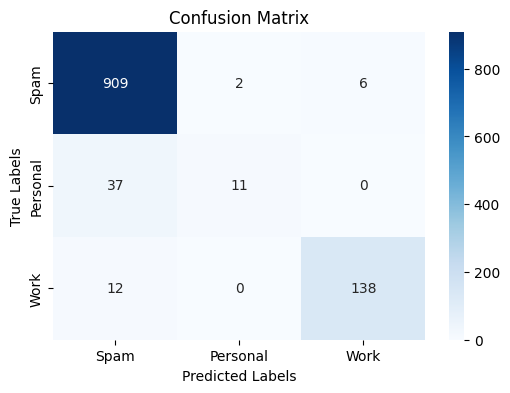

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Personal', 'Work'], yticklabels=['Spam', 'Personal', 'Work'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## **Testing Custom Emails**

In [42]:
# Optionally, you can test the classifier with a custom email
def test_custom_email(email):
    email_vectorized = vectorizer.transform([email])
    prediction = classifier.predict(email_vectorized)
    return prediction[0]

custom_emails = [
    "Reminder: Submit the project report by Monday to the manager.",                  # Work
    "Team meeting scheduled tomorrow at 10 AM in the conference room.",               # Work
    "Client feedback received, please review and make changes accordingly.",          # Work
    "Hey! Let's catch up over lunch this weekend. Long time no see!",                 # Personal
    "Happy birthday! Hope you have an amazing day filled with love and joy.",         # Personal
    "Looking forward to the holiday trip with friends next month!",                   # Personal
    "Congratulations! You've won a free iPhone. Click here to claim your prize!",     # Spam
    "Get rich quick with this secret investment method. Limited time only!",          # Spam
    "URGENT: Your account has been compromised. Verify your information now!",        # Spam
    "Exclusive offer! Save 70% on your next purchase. Act now!"                       # Spam
]

# Classify and print the results
for i, email in enumerate(custom_emails, 1):
    print(f"Custom email classification {i}: {test_custom_email(email)}")



Custom email classification 1: Work
Custom email classification 2: Work
Custom email classification 3: Personal
Custom email classification 4: Personal
Custom email classification 5: Personal
Custom email classification 6: Personal
Custom email classification 7: spam
Custom email classification 8: Personal
Custom email classification 9: spam
Custom email classification 10: spam
